# **Homework 3**
---

## **Import the necessary tools**
---

In [1]:
import numpy as np                                       # Importing numpy tools
import pandas as pd                                      # Used for importing data
import matplotlib.pyplot as plt                          # Creating scatter plots
import seaborn as sns
from mpl_toolkits import mplot3d                         # Importing tools to create graphs with the z-axis without breaking
from sklearn.linear_model import LinearRegression        # Use sklearn to depict line of best fit
from sklearn.metrics import mean_squared_error, r2_score # Visualization of Mean Squared Error 
from tqdm import tqdm                                    # Showing a progress bar to visualize a far a program is in running it's contents
from math import log                                     # Math tool to read log equations in algebra and in graphs
from math import exp

---

## **Import the Datasets and turn them into arrays**
---

In [2]:
Data1 = np.array(pd.read_csv('~/Files/Data/Scatter_Data_HW3/scatter_HW3_set_1.csv')) # Import the first dataset

In [3]:
Data2 = np.array(pd.read_csv('~/Files/Data/Scatter_Data_HW3/scatter_HW3_set_2.csv')) # Import the second dataset

In [4]:
Data3 = np.array(pd.read_csv('~/Files/Data/Scatter_Data_HW3/scatter_HW3_set_3.csv')) # Import the third dataset

---

## **Graphing the Data Individually**
---

### ***Graph Scatter Data Set 1***
---
Not all datasets will have more than one feature to visualize. For this reason, the creation of a new column becomes necessary. There is no new column to the actual data being imported. But it will add itself in relevance to wherever the data is placed on the graph.

---

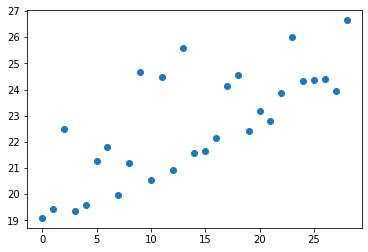

In [5]:
# Creating time-variable relating to the data in the order that it came.

t1 = np.arange(0,len(Data1)) # t1 = time-variable
plt.scatter(t1, Data1)       # x-axis = t1, y-axis = imported data
plt.show()                   # Display the final result

                             # Time-variable: Placeholder column on the graph typically used for changes in the data over time. 

---

### ***Graph Scatter Data Set 2***
---

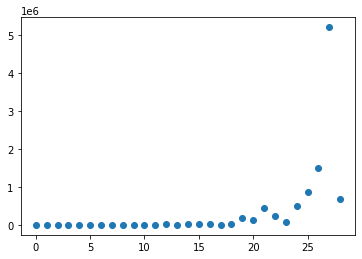

In [6]:
t2 = np.arange(0,len(Data2)) # From zero, to however long the data is
plt.scatter(t2,Data2)        # 
plt.show()

---

### ***Graph Scatter Data Set 3***
---

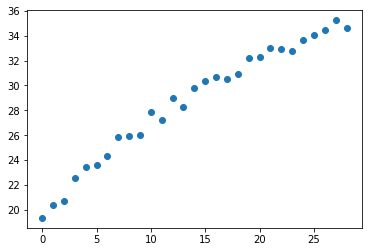

In [7]:
t3 = np.arange(0,len(Data3))
plt.scatter(t3,Data3)
plt.show()

---

## **Time-variable Reshapes**
---
The initial shape of a dataset indicates the number of rows and columns. However, if the data as an array is measured from -1 to 1 rather than 0 to 1, then reshaping the data to compensate for the new range becomes necessary. That way, the data is compatible with models it must fit into for both visualization and scoring.

Time variables are not automatically attuned to fit with the imported data. Therefore, the reshape command must be applied so it can match the dataset's shape and properly measure line accuracy

---

### ***Shape t1***
---

In [8]:
# Initial shape of t1
np.shape(t1)                  # 1 column and 29 rows

(29,)

In [9]:
# Saving the new shape of the data to a new variable
t1 = np.reshape(t1,(29,1))    # Statement of t1's new shape

In [10]:
np.shape(t1)                  # Display new shape of t1

(29, 1)

---

### ***Shape t2***
---

In [11]:
# Initial shape of t2
np.shape(t2)                  # 1 column and 29 rows

(29,)

In [12]:
t2 = np.reshape(t2,(29,1))    # Display the new shape of t2

In [13]:
np.shape(t2)                  # Display the new shape of t2

(29, 1)

---

### ***Shape t3***
---

In [14]:
np.shape(t3)                  # 1 column and 29 rows

(29,)

In [15]:
t3 = np.reshape(t3,(29,1))       # Statement t3's new shape

In [16]:
np.shape(t3)                  # Display the new shape of t3

(29, 1)

---

## **Interpreting Line Accuracy in Relevance to a perfect line**
---
With SKLearn, data visualizations in the form of scatter graphs can be evaluated to determine just how linear they are. The scale, known as the coefficient of determination is measured from a range 1.0 for the best possible alignment, to 0, which indicates the worst possible alignment.

---

### ***Scoring Graph 1***
---

In [17]:
reg = LinearRegression().fit(t1, Data1) # Apply Linear Regression Formula to the t1, Data1 graph 
reg.score(t1, Data1)                   # Display final line accuracy score

0.5698861405105139

- A line is barely visible within the data points of the graph.

---

### ***Scoring Graph 2***
---

In [18]:
reg = LinearRegression().fit(t2, Data2) # Apply Linear Regression Forumula to the t2, Data2 graph
reg.score(t2, Data2)                    # Display final line accuracy score

0.24379399107472566

- There is little to no line correlation between Data2 and t2.

---

### ***Scoring Graph 3***
---

In [19]:
reg = LinearRegression().fit(t3,Data3)
reg.score(t3, Data3)

0.9655322293038338

- A near-perfect line of best fit can be made through the data points on the graph.

---

## **Graphing Line of Best Fit for Each Graph**
---
In the many cases of it's uses. Line of best fit is used to visualize the proportion of a projected data set from an ideal slope or rate of change. In the case of machine learning, a line of best fit is used to determine the linear accuracy of data to be fed to a machine for education, processing, and fulfillment of a certain task. The more data points that pass through the line of best fit, the more constant the learning curve of the machine. In conclusion, a line of best fit is used to visualize the progression of a machine's training when analyzing data. 

---

In [28]:
def gradientDescentLinearRegression(dataframe,learning_rate,times):
    col_number = dataframe.shape[0]     # Base the number of columns on the structure of the imported data
    new_col = np.arange(1,col_number+1) # Which new column, add it to the initial number from the dataframe
    dataframe['x'] = new_col            # Set the x-axis to be the updated column number 
    col_name=['y','x']                  # Arrange the column numbers into a two-dimensional graph
    dataframe.columns=col_name          #
    temp_cols = dataframe.columns.tolist()
    new_cols = temp_cols[-1:] + temp_cols[:-1]
    dataframe = dataframe[new_cols]
    x = dataframe['x']
    y = dataframe['y']
    
    weight_m = np.random.rand(1)
    weight_b = np.random.rand(1)
    y_intercept = [weight_b]
    slope = [weight_m]
    N = len(y)
    
    for i in tqdm(range(times)):
        
        prediction = weight_m * x + weight_b
        
        error = prediction - y
        
        m = weight_m - learning_rate * (2/N) * (error.sum())
        b = weight_b - learning_rate * (2/N) * ((x*error).sum())
        
        weight_m = m
        weight_b = b
        y_intercept.append(weight_b)
        slope.append(weight_m)
        
    plt.scatter(dataframe['x'],dataframe['y'])
    
    plt.plot(x, weight_m * x + weight_b, c = "r")
    
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.show()

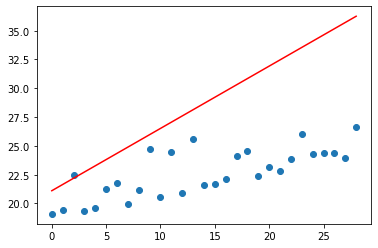

In [21]:
linreg1 = LinearRegression().fit(t1, Data1) # Producing the line of best fit in relevance to the time variable with the graph and the dataset assigned to it
m1 = reg.coef_                              # Setting the line's slope
b1 = reg.intercept_                         # Setting the y-intercept the line will begin from


plt.plot(t1, m1 * t1 + b1, c='r')           # Applying the linear equation, y = mx + b to the line of best fit
plt.scatter(t1, Data1)                      # Creating the scatter graph
plt.show()                                  # Display the final result

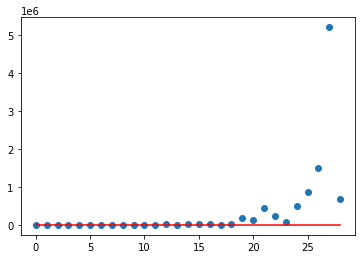

In [26]:
linreg2 = LinearRegression().fit(t2, Data2) # Producing the line of best fit in relevance to the time variable with the graph and the dataset assigned to it
m2 = reg.coef_                              # Setting the line's slope
b2 = reg.intercept_                         # Setting the y-intercept the line will begin from 


plt.plot(t2, m2 * t2 + b2, c='r')           # Applying the linear equation, y = mx + b to the line of best fit
plt.scatter(t2, Data2)                      # Creating the scatter graph
plt.show()                                  # Display the final result

- The line of best fit does not match the formula rate of change in the graph. The upward curve of the data points appears similar to an exponent. Therefore, the line of best fit must depict a line as close to the ideal rate of change as possible. The formula for exponent slope is $y= x^2$.

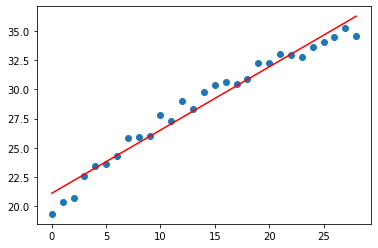

In [23]:
linreg3 = LinearRegression().fit(t3, Data3) # Producing the line of best fit in relevance to the time variable with the graph and the dataset assigned to it
m3 = reg.coef_                              # Setting the line's slope
b3 = reg.intercept_                         # Setting the y-intercept the line will begin from


plt.plot(t3, m3 * t3 + b3, c='r')           # Applying the linear equation, y = mx + b to be the line of best fit
plt.scatter(t3, Data3)                      # Creating the scatter graph 
plt.show()                                  # Display the final result

- The data depiction in the third graph is in-accurate because the scatter points are supposed to be synonymous with a rate of change caused by the log symbol. However, the curve in the middle of the lines is not entirely visible. Therefore the programmer may register the scatter points to be closer to linear then the other two graphs. 

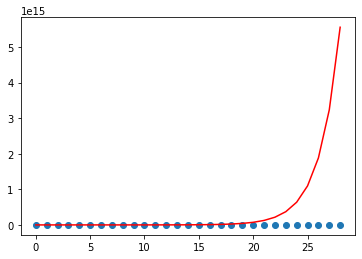

In [29]:
m = reg.coef_
b= reg.intercept_

plt.plot(t2, np.exp(m*t2 + b), color = "r")
plt.scatter(t2, Data2)
plt.show()

---